##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include descriptinve title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, you MUST protect those operations in an if statement by calling the is_databricks() function provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.  

In [14]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

The cell below reads the datafiles needed for part 2 of this assignment into spark dataframes.

In [34]:
# do not change this cell
pop_df = spark.read.format("csv").option("header", "true").load(get_training_filename("indicator_gapminder_population.csv"))
mort_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_gapminder_under5mortality.csv'))
life_exp_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_life_expectancy_at_birth.csv'))
fert_df = spark.read.format("csv").option("header", "true").load(get_training_filename('indicator_undata_total_fertility.csv'))
display(pop_df.toPandas().head())

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,15700,15700,15700,None,None,None,None,None,None,None
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


In [35]:
display(mort_df.toPandas().head())

,Under five mortality,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,375.2,...,19.5,18.7,17.9,17.3,16.6,16,15.5,14.9,14.4,14
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24


In [36]:
display(life_exp_df.toPandas().head())

,Life expectancy with projections. Yellow is IHME,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,28.211,28.20075333,28.19050667,28.18026,28.17001333,28.15976667,28.14952,28.13927333,28.12902667,...,53.2,53.6,54,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,74.5,74.7,74.9,75,75.2,75.5,75.7,75.8,75.9,76
4,Algeria,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,28.8224,...,74.8,75,75.3,75.6,75.9,76.1,76.2,76.3,76.4,76.5


In [37]:
display(fert_df.toPandas().head())

,Total fertility rate,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Afghanistan,7,7,7,7,7,7,7,7,7,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.85,1.8,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.8,2.76,2.71


Note: Starting with this homework and moving forward, students are expected to use spark as opposed to numpy or pandas unless directed otherwise.  This note will not be repeated in the future.

# Part 1: Map / Reduce
Part 1 uses the central limit theorem to provide you with an opportunity to practice using the map / reduce programming paradigm.

# Question 1: Central Limit Theorem Simulation (10 pts)
Create a single dimensional pyspark RDD named bernoulli_rdd that contains 10,000 Bernoulli probability distribution data points consisting of integer 0 or 1.  P(0) = P(1) = 0.5.  Use only pyspark RDDs to complete this question.  Create a histogram of the RDD to show that it follows the Bernoulli distribution.

In [16]:
# your code here


##### Grading Feedback Cell

# Question 2: Sample the Bernoulli distribution using CLT (10 pts)
Using principals from CLT theory, create a new 2 dimensional RDD named bernoulli_sample_rdd that contains sample data from bernoulli_rdd.  The shape of bernoulli_sample_rdd shall be num_obs_per_sample X num_samples.  Print the shape of bernoulli_sample_rdd.

In [17]:
# your code here


##### Grading Feedback Cell

# Question 3: Create Sampling Distribution (20 pts)
Using pyspark map and reduce, create a new RDD named bernoulli_sample_mean_rdd that contains the sampling distribution of the means of the samples contained in bernoulli_sample_rdd.  Create a histogram from bernoulli_sample_mean_rdd to prove that the resulting distribution follows the principals of the CLT.

In [18]:
# your code here


##### Grading Feedback Cell

# Question 4 Python Map (20 pts): 
The code below is copied from the IST-718 Numpy Tutorial Student Version notebook.  It turns out that python has built in map and reduce functions.  You shall answer this question just using just the python map function.  Start out by reading the online python documentation for map.  Then modify the for and while loops below to use a python map function instead.  The plots shall be printed as a result of printing the return value from the python map function. You can create one or more functions which are called by the map function.  You may use lambda functions or create named functions.  Just to reiterate, we are not using the spark map function in this question; but rather, we are using the python map function. This question purposely asks you to learn something new about python on your own.  As data scientists, you need to be able to learn new things on your own by reading tech manuals.

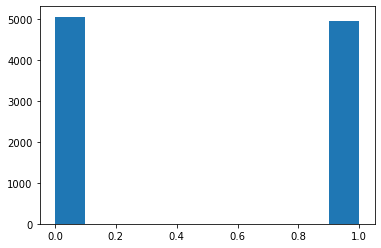

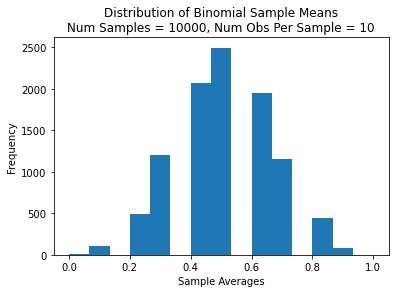

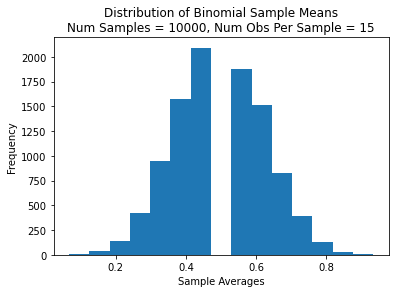

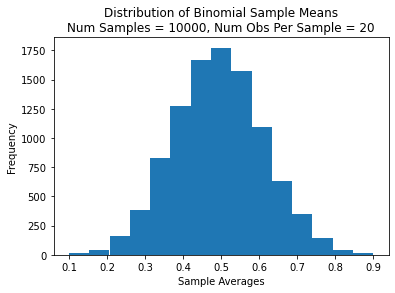

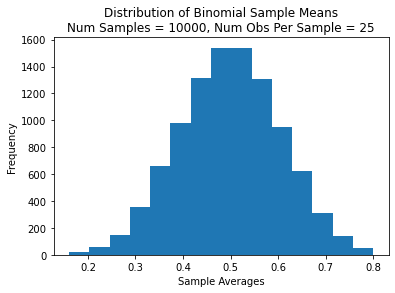

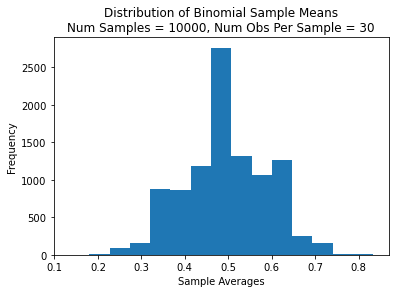

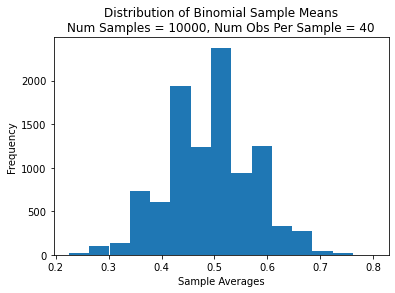

In [19]:
# Code from in class notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# create 10,000 binomial data points
binomial_dat = np.random.binomial(1, 0.5, 10000)
# print(binomial_dat[:10])

# plot the binomial data as a histogram
_, _, _ = plt.hist(binomial_dat)

#plt.title("Binomial Histogram")
#plt.xlabel("Outcome")
# plt.ylabel("Frequency")

# define the number of samples
num_samples = 10000

# Sample the binomial data with various numbers of observations per sample
num_obs_per_samp = [10, 15, 20, 25, 30, 40]

# create a numpy array to store the sampling distribution of means
sample_ave = np.zeros(num_samples)

# Replace the following for and while loops with a python map function and print call
# example: result = map(...)
#          print(result)
# Start Student Modified Code Area
for num_obs in num_obs_per_samp:
    i = 0
    while i < num_samples:
        # Draw num_samples with replacement from the binomial distributionl. Each sample
        # has num_obs_per_samp observations per sample.  Take the mean of each sample.
        sample_ave[i] = np.mean(np.random.choice(binomial_dat, num_obs))
        i = i + 1
        
    plt.figure()
    plt.hist(sample_ave, bins=15)
    plt.title("Distribution of Binomial Sample Means\nNum Samples = {}, Num Obs Per Sample = {}".format(num_samples, num_obs))
    plt.xlabel("Sample Averages")
    plt.ylabel("Frequency")
# End Student Modified Code Area

##### Grading Feedback Cell

# Part 2: Spark Dataframes
Part 2 uses the dataset from homework 1 to gain experience in using spark dataframes.

# Question 5: Gapminder Data From Homework 1 Revisited (10 pts)
Starting with pop_df, mort_df, life_exp_df, and fert_df above, create new data frames pop_df_1, mort_df_1, life_exp_df_1, and fert_df_1.  Just like homework 1, rename the column with the country names as "Country".  Print the resulting shape of each dataframe along with a message indicating the specific dataframe name.

In [20]:
# your code here


In [ ]:
# grading cell do not modify
pop_df_1_pd = pop_df_1.toPandas()
display(pop_df_1_pd.head())
print(pop_df_1_pd.shape)

mort_df_1_pd = mort_df_1.toPandas()
display(mort_df_1_pd.head())
print(mort_df_1_pd.shape)

life_exp_df_1_pd = life_exp_df_1.toPandas()
display(life_exp_df_1_pd.head())
print(life_exp_df_1_pd.shape)

fert_df_1_pd = fert_df_1.toPandas()
display(fert_df_1_pd)
print(fert_df_1_pd.shape)

##### Grading Feedback Cell

# Question 6 (10 pts): 
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe. The join operation should not throw away any data. Name the new dataframe concat_df. Next, delete all rows where the data values (values other than country and year) are all NaN values. Only drop the row if ALL the data values are NaN.

In [21]:
# your code here


In [ ]:
# grading cell do not modify
concat_pd_df = concat_df.toPandas()
display(concat_pd_df.head())
print(concat_pd_df.shape)

##### Grading Feedback Cell

# Question 7 (10 pts):
Examine if there was a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data. Create a scatter plot of life expectancy versus fertiltiy for 1962 for Africa, Asia, Europe, and the Americas. Use color to denote continent and point size to denote population size. Do you see a dichotomy?  Explain your conclusions by supporting your conclusions with observations from the data.

In [22]:
# your code here


##### Grading Feedback Cell

Your explanation here: 

##### Grading Feedback Cell

# Question 8 (10 pts):
Learn about OECD and OPEC countries. OECD member countries can be found [here](https://www.oecd.org/about/document/list-oecd-member-countries.htm).  OPEC member countries can be found [here](https://www.opec.org/opec_web/en/about_us/25.htm).  Create a new dataframe named concat_df_oecd_opec.  Add a new column to concat_df_oecd_opec containing a logical vector that tells if a country is OECD and OPEC respectively. Create a new spark summary dataframe named totals_df that contains 1 row and 2 columns. Populate totals_df columns with the count of OPEC and OECD countries from concat_df_oecd_opec.  Name the columns in totals_df OPEC_total and OECD_total.  Make the same plot as in question 6 above, but this time use color to annotate the OECD countries and OPEC countries. For countries that are not part of these two organization annotate if they are from Africa, Asia, or the Americas.  Do you see a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data.  Explain your conclusions by supporting your conclusions with observations from the data.  

In [23]:
# your code here

##### Grading Feedback Cell

Your explanation here: 

In [ ]:
# grading cell - do not modify
concat_df_oecd_opec_pd = concat_df_oecd_opec.toPandas()
display(concat_df_oecd_opec_pd.head())
print(concat_df_oecd_opec_pd.shape)

display(totals_df.toPandas())

##### Grading Feedback Cell